<a href="https://colab.research.google.com/github/IshaKanani/-data_mgmt_rsch_life_cycle/blob/master/Week_5_Text_and_relation_as_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Learning objectives
* Understand and implement natural language processing using nltk
* Plot frequency distribution graph
* Use [Networkx](https://networkx.github.io/) & [Gephi](https://gephi.org/) for visualization using million dollar dataset

**To-do List**
* Install [Git Bash](https://git-scm.com/)
* Find a bing API to retrieve list of links of articles with similar keywords

**Dataset Used**
 MDL: [Million Dollar List](https://mdphil.webtest.iu.edu/data/download/thankyou.html)

**Practice for Regular Expression:**
[RegexOne](https://regexone.com/)

#Frequency Distribution

**Explain frequency dist**

* Frequency distribution shows the number of times a word is used in a document
* Given a document, each unique word is considered one token, and the frequency i.e. the number of occurance is calculted.

**Objective of Frequency Distribution**

* By looking at the highest occuring words, one can infer the context or the main topic of the whole document.

**Drawbacks**

* We will get highest frequency for the words is, the, a, am etc..: These words are not significant for the analysis of any document
* Same words used in different formats: paint, painting, painted, paints all mean the same but change the form according to sentence. This will generate many tokens for the same word and won't produce accurate results.

##1. Importing packages and dataset

**Packages Used**

[nltk](https://www.nltk.org/): Natural Lanhuahe Toolkit provides various functions to be performed on the human language to modify it and use it further for machine understanding objectives



In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.stem.porter import *

In [0]:
df_main = pd.read_csv("https://mdphil.webtest.iu.edu/doc/donations.csv", encoding='latin-1')
print(list(df_main))

['ID', 'Donor Name', 'Donor Type', 'Donor Group', 'Donor City', 'Donor State', 'Donor Country', 'Donor Division', 'Donor Region', 'Donor Description', 'Recipient', 'Recipient Notes', 'Recipient Subsector', 'Recipient Subsector (Secondary)', 'Recipient Sub Group', 'Recipient City', 'Recipient State', 'Recipient Country', 'Recipient Continent', 'Recipient Division', 'Recipient Region', 'Dollars', 'Donation Subgroup', 'Gift Notes', 'Gift Purpose', 'Source of Donor Wealth', 'Disaster', 'Pledge', 'Payment Over Time', 'Challenge Grant', 'Estate', 'Source', 'Foundation Search', 'Date Reported', 'Quarter', 'Year', 'To Own Foundation', 'Associated Foundation', 'Recipient Link', 'Donor Tidbits', 'Donor Continent']


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (24,29,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


##2. Generaing list of words

**1. Tokenization**
[nltk.tokenize for word_tokenizer](https://www.nltk.org/api/nltk.tokenize.html)

* Tokenization in this context is implemented on word-level
* Given a large string, i.e. a document, it breaks it down into chunks everytime it encounters a "space" in the string
* "Data Management and Research Life Cycle" --> ["Data", "Management", "and", "Research", "Life", "Cycle"]

**Provide an example using sentence**


**2. Stop Words Removal**
[nltk.corpus for stop_words](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/)
* Removing insignificant words from a document
* Baisc stop words: is, a, the, an, I, we etc..
* The list of stop words may be appended depending on the document given and the objective of the task
["Data", "Management", "and", "Research", "Life", "Cycle"] --> ["Data", "Management",  "Research", "Life", "Cycle"]

**3. Stemmer**
[nltk.stem.porter](https://www.nltk.org/api/nltk.stem.html)
* Chopping off few ending characters of the word to simplify the word
* Painting, paints, painted, paint ---> all treated as Paint after stemmer is applied


**String Functions Used**

1. [s.lower](https://www.tutorialspoint.com/python/string_lower.htm): To lowercase all the characters in a word
2. [s.isalpha](https://www.geeksforgeeks.org/python-string-isalpha-application/): Returns True if the input consists of all characters being alphabets, returns false if a number is encountered
3, [More Functions](https://www.w3schools.com/python/python_ref_string.asp)

In [0]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stemmer=PorterStemmer()

stop_words=stopwords.words('english')

recipient_token_list=[]
for entry in df_main["Recipient"]:
    if str(entry)!='nan':
        recipient_token_list+=[stemmer.stem(s) for s in word_tokenize(entry) if s.lower() not in stop_words and s.isalpha()]

recipient_token_list

['hurrican',
 'relief',
 'effort',
 'variou',
 'relief',
 'effort',
 'american',
 'red',
 'cross',
 'chapman',
 'univers',
 'univers',
 'maryland',
 'adelphi',
 'colgat',
 'univers',
 'smithsonian',
 'institut',
 'american',
 'red',
 'cross',
 'smithsonian',
 'institut',
 'nation',
 'museum',
 'african',
 'american',
 'histori',
 'cultur',
 'martin',
 'luther',
 'king',
 'Jr',
 'nation',
 'memori',
 'variou',
 'relief',
 'effort',
 'american',
 'red',
 'cross',
 'american',
 'red',
 'cross',
 'american',
 'red',
 'cross',
 'cascad',
 'health',
 'solut',
 'variou',
 'relief',
 'effort',
 'variou',
 'nonprofit',
 'organ',
 'african',
 'medic',
 'research',
 'foundat',
 'african',
 'medic',
 'research',
 'foundat',
 'univers',
 'goucher',
 'colleg',
 'sunnyval',
 'commun',
 'servic',
 'univers',
 'central',
 'florida',
 'auburn',
 'univers',
 'medic',
 'center',
 'central',
 'georgia',
 'american',
 'committe',
 'weizmann',
 'institut',
 'scienc',
 'weizmann',
 'institut',
 'scienc',
 'ba

##In-Class Assignment

Generate a list of words using your dataset

##3. Plotting a graph by counting the number of occurances of a word

**Functions Used**

1. [nltk.FreqDist](http://www.nltk.org/api/nltk.html?highlight=freqdist)
2. [Plotting a FrqDist](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)

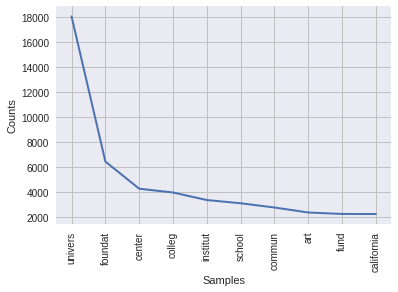

In [0]:
fd=nltk.FreqDist(recipient_token_list)
fd.plot(10, cumulative=False, figure=plt.figure())

##4. Removing insignifact words, appending stop_list 

<class 'list'>


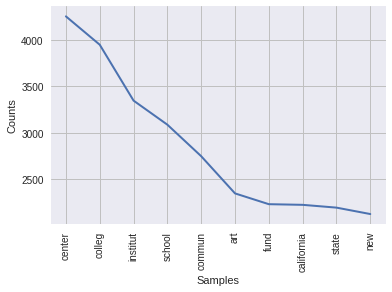

In [0]:
print(type(stop_words))
stop_words.append('university')
stop_words.append('foundation')

recipient_token_list_new=[]
for entry in df_main["Recipient"]:
    if str(entry)!='nan':
        recipient_token_list_new+=[stemmer.stem(s) for s in word_tokenize(entry) if s.lower() not in stop_words and s.isalpha()]

for entry in df_main["Recipient"]:
  for s in word_tokenize(entry):
    if s.lower() not in stop_words and s.isalpha():
      recipient_token_list_new += stemmer.stem(s)
      
        
fd=nltk.FreqDist(recipient_token_list_new)
fd.plot(10, cumulative=False, figure=plt.figure())

##In-Class Assignment

Generate a frequency dist graph for your list of words

#Networkx

Package Used:
[netwrokx](https://networkx.github.io/documentation/stable/tutorial.html) is used to understand graphs and netwroks. Entities can be assigned as nodes, and two nodes can be linked to show a relation, this link is called edge.

In [0]:
import networkx as nx

data_edges = df_main[["Donor Name", "Recipient"]]

#print(data_edges.head(10))

routers = []
#routers.append(val for val in data_edges["Donor Name"].values.tolist() if val in data_edges["Recipient"].values.tolist())
#print(routers)

for val in data_edges["Donor Name"].drop_duplicates().values:
  if val in data_edges["Recipient"].values:
    routers.append(val)
    
print(routers)

['American Foundation', 'American Red Cross', 'Annenberg Foundation', 'Bernard Osher Foundation', 'Bill & Melinda Gates Foundation', 'Blanche and Julian Robertson Family Foundation', 'Charles K Blandin Foundation', 'Bush Foundation', 'California Community Foundation', 'California Endowment', 'California Institute for Regenerative Medicine', 'Carnegie Corporation of New York', 'Cleveland Clinic', 'Cleveland Foundation', 'Colorado Trust', 'Communities Foundation of Texas', 'Community Foundation of the Eastern Shore', 'Conrad N Hilton Foundation', 'Daniels Fund', 'Desert Healthcare District', 'Donald W Reynolds Foundation', 'Ellison Medical Foundation', 'Entertainment Industry Foundation', 'Erickson Foundation', 'Evjue Foundation', 'Florida Communities Trust', 'Florida Hospital', 'Ford Foundation', 'Freddie Mac Foundation', 'Give2Asia', 'Gordon and Betty Moore Foundation', 'Kessler Foundation', 'William and Flora Hewlett Foundation', 'Highmark Foundation', 'J A and Kathryn Albertson Found

In [0]:
#g.nodes(data=True)[0:10]

#Add third type for common names: Router

G = nx.Graph()
G.add_nodes_from(data_edges["Donor Name"], node_type="donor")
G.add_nodes_from(data_edges["Recipient"], node_type="recipient")
G.add_edges_from(data_edges.values)

#Change the type later
# if node in nx.node in router: change the node_type



In [0]:
#G.nodes(data=True)
G.nodes['Annenberg Foundation']

{'node_type': 'recipient'}

In [0]:
for val in routers:
  G.nodes[val]['node_type'] = "router" 

In [0]:
G.nodes['Annenberg Foundation']

{'node_type': 'router'}

In [0]:
G.edges(data=True) #[0:20]

EdgeDataView([('3M', 'Hurricane relief efforts', {}), ('3M', 'Various relief efforts', {}), ('3M', 'Various nonprofit organizations', {}), ('3M and 3M Foundation', 'American Red Cross', {}), ('A Gary Anderson Family Foundation', 'Chapman University', {}), ('A Gary Anderson Family Foundation', 'Hoag Memorial Hospital', {}), ('A Gary Anderson Family Foundation', 'Big Brothers Big Sisters of Orange County', {}), ('A Gary Anderson Family Foundation', 'Casa Colina Center for Rehabilitation', {}), ('A Gary Anderson Family Foundation', 'Chapman Athletic Pavilion', {}), ('A Gary Anderson Family Foundation', 'Hoag Hospital Foundation', {}), ('A James Clark', 'University of Maryland - Adelphi', {}), ('A James Clark', 'Johns Hopkins University', {}), ('A James Clark', 'George Washington University', {}), ('A Theodore and Helen K Persson', 'Colgate University', {}), ('AFLAC', 'Smithsonian Institution', {}), ('AFLAC', 'American Red Cross', {}), ('AFLAC', 'Smithsonian Institution - National Museum o

In [0]:
nx.write_graphml(G, "test_donations.graphml")